### Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

### Importing Data

In [2]:
df = pd.read_csv('shopping_behavior_updated.csv')

### Understanding the Data 

In [3]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [4]:
df.tail()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly
3899,3900,52,Female,Handbag,Accessories,81,California,M,Beige,Spring,3.1,No,Store Pickup,No,No,33,Venmo,Quarterly


In [5]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [6]:
df.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [7]:
df.shape

(3900, 18)

In [8]:
df.duplicated().value_counts()

False    3900
Name: count, dtype: int64

In [9]:
df.nunique()

Customer ID               3900
Age                         53
Gender                       2
Item Purchased              25
Category                     4
Purchase Amount (USD)       81
Location                    50
Size                         4
Color                       25
Season                       4
Review Rating               26
Subscription Status          2
Shipping Type                6
Discount Applied             2
Promo Code Used              2
Previous Purchases          50
Payment Method               6
Frequency of Purchases       7
dtype: int64

In [10]:
print(df.apply(lambda col: col.unique()))

Customer ID               [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
Age                       [55, 19, 50, 21, 45, 46, 63, 27, 26, 57, 53, 3...
Gender                                                       [Male, Female]
Item Purchased            [Blouse, Sweater, Jeans, Sandals, Sneakers, Sh...
Category                       [Clothing, Footwear, Outerwear, Accessories]
Purchase Amount (USD)     [53, 64, 73, 90, 49, 20, 85, 34, 97, 31, 68, 7...
Location                  [Kentucky, Maine, Massachusetts, Rhode Island,...
Size                                                          [L, S, M, XL]
Color                     [Gray, Maroon, Turquoise, White, Charcoal, Sil...
Season                                       [Winter, Spring, Summer, Fall]
Review Rating             [3.1, 3.5, 2.7, 2.9, 3.2, 2.6, 4.8, 4.1, 4.9, ...
Subscription Status                                               [Yes, No]
Shipping Type             [Express, Free Shipping, Next Day Air, Standar...
Discount App

In [11]:
df.groupby('Promo Code Used')['Discount Applied'].value_counts().reset_index()

,Promo Code Used,Discount Applied,count
0,No,No,2223
1,Yes,Yes,1677


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer ID,3900.0,1950.500000,1125.977353,1.0,975.75,1950.5,2925.25,3900.0
Age,3900.0,44.068462,15.207589,18.0,31.00,44.0,57.00,70.0
Purchase Amount (USD),3900.0,59.764359,23.685392,20.0,39.00,60.0,81.00,100.0
Review Rating,3900.0,3.749949,0.716223,2.5,3.10,3.7,4.40,5.0
Previous Purchases,3900.0,25.351538,14.447125,1.0,13.00,25.0,38.00,50.0


In [14]:
df.describe(include=['object']).T

,count,unique,top,freq
Gender,3900,2,Male,2652
Item Purchased,3900,25,Blouse,171
Category,3900,4,Clothing,1737
Location,3900,50,Montana,96
Size,3900,4,M,1755
Color,3900,25,Olive,177
Season,3900,4,Spring,999
Subscription Status,3900,2,No,2847
Shipping Type,3900,6,Free Shipping,675
Discount Applied,3900,2,No,2223


### Data Cleaning and Preparation

In [15]:
#dropping customer id and promo code used as they are not needed for analysis
df.drop(['Customer ID','Promo Code Used'], axis=1, inplace=True)

Dropped customer id because it does not provide any insight into the shopping behaviours or trends of customers. I also dropped promo code used as it contained the same data as discount applied. 

In [25]:
#creating age group column
bins = [0,18,30,40,50,60,70]
labels = ['<19', '19-30', '31-40', '41-50', '51-60', '61-70']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

In [17]:
df.head()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Previous Purchases,Payment Method,Frequency of Purchases,Age Group
0,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,14,Venmo,Fortnightly,51-60
1,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,2,Cash,Fortnightly,19-30
2,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,23,Credit Card,Weekly,41-50
3,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,49,PayPal,Weekly,19-30
4,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,31,PayPal,Annually,41-50


In [47]:
# Defining function to plot graphs for top items

def plot_stacked_bar(data, index_col, value_col, category_col, palette='tab20', 
                     ax=None, title='', order=None, rotation=45):
    """
    Creates a stacked bar plot for top items by segment.
    
    Parameters:
    - data: DataFrame containing the data
    - index_col: Column to group by (x-axis)
    - value_col: Column to count (usually 'Count')
    - category_col: Column to pivot on (stacked categories)
    - palette: Color palette
    - ax: Matplotlib axis to plot on
    - title: Title of the plot
    - order: Order of x-axis categories
    - rotation: Rotation of x-axis labels
    """
    # Aggregate (in case multiple rows exist per group/category)
    grouped = data.groupby([index_col, category_col])[value_col].sum().reset_index()
    
    # Pivot for stacked bar plot
    pivot_df = grouped.pivot(index=index_col, columns=category_col, values=value_col).fillna(0)
    
    # Reindex to enforce specific order
    if order is not None:
        pivot_df = pivot_df.reindex(order)
        
    # Plot
    if ax is None:
        ax = plt.gca()
    pivot_df.plot(kind='bar', stacked=True, color=sns.color_palette(palette, n_colors=len(pivot_df.columns)), ax=ax)
    
    ax.set_xticklabels(ax.get_xticklabels(), rotation=rotation)
    ax.set_ylabel('Count')
    ax.set_title(title)
    ax.legend(title=category_col, bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Add bar labels
    for c in ax.containers:
        labels = [f"{v.get_height():.0f}" if v.get_height() > 0 else "" for v in c]
        ax.bar_label(c, labels=labels, label_type='center', fontsize=8)
    

### Data Analysis and Visualization

#### General Analysis

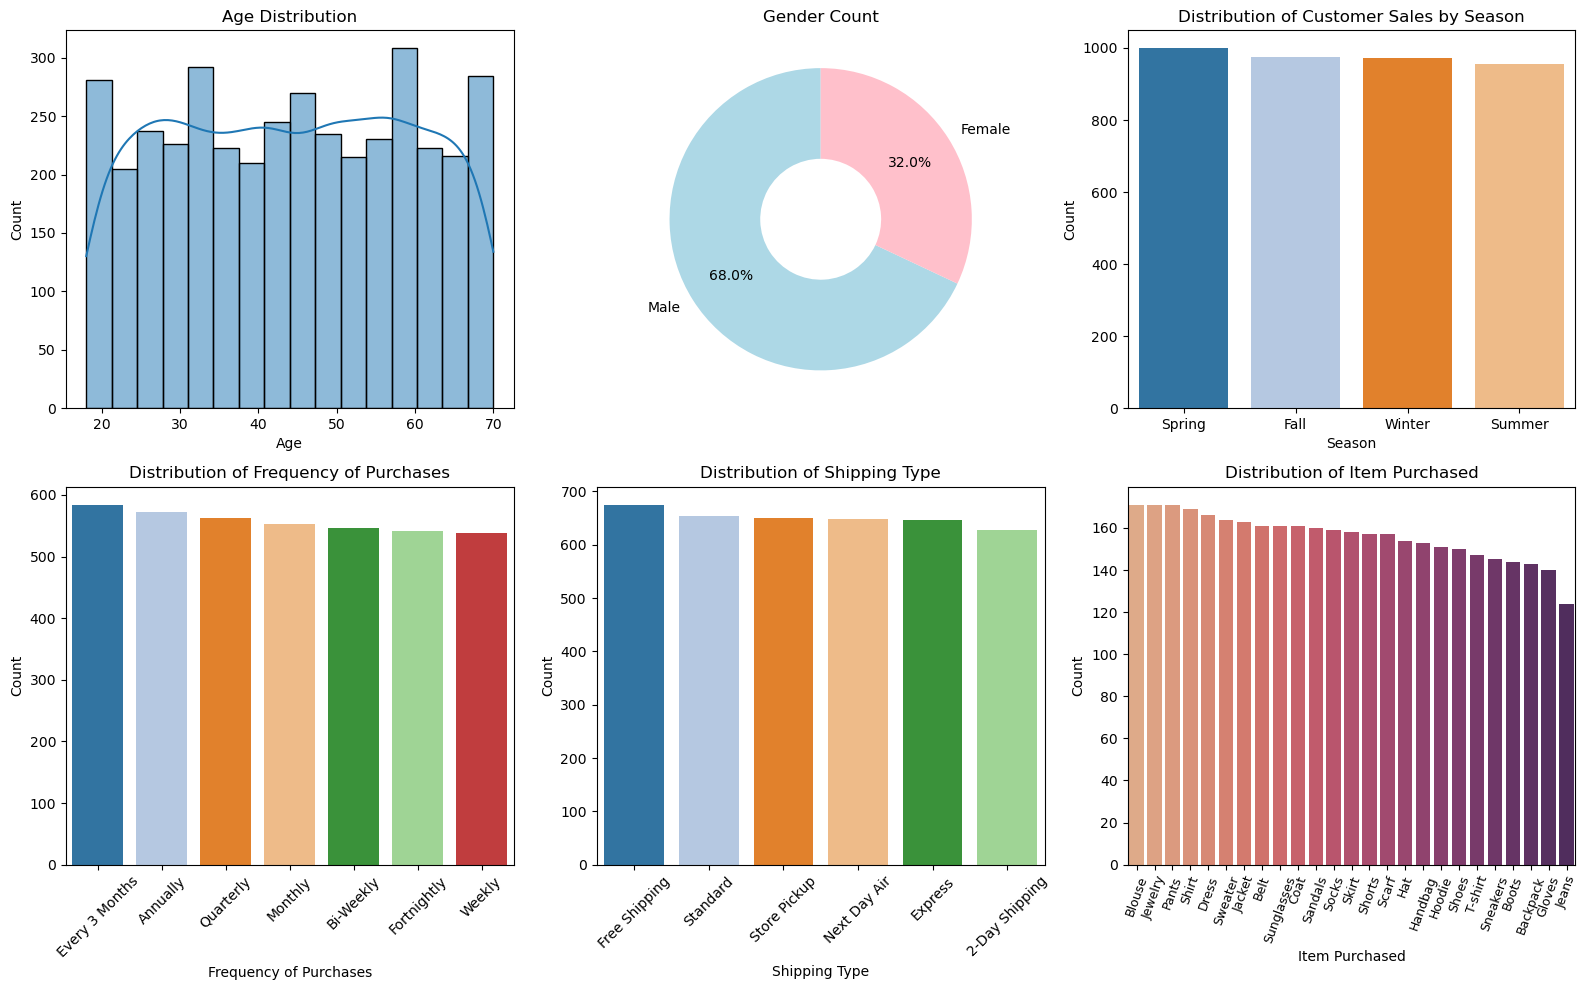

In [26]:
#General Analysis
fig = plt.figure(figsize=(16,10))

# Plot 1
ax1 = plt.subplot(2,3,1)
sns.histplot(data=df, x='Age', kde=True, ax=ax1)
ax1.set_title("Age Distribution")

# Plot 2
gender_count = df['Gender'].value_counts().reset_index(name='Count')
colors = ['lightblue', 'pink']

ax2 = plt.subplot(2,3,2)
ax2.pie(
    gender_count['Count'], 
    labels=gender_count['Gender'], 
    colors=colors,
    startangle=90,
    autopct='%1.1f%%', 
    textprops = {'fontsize':10},
    pctdistance=0.7,
    wedgeprops=dict(width=0.6)
)
ax2.set_title('Gender Count', fontsize=12)

# Plot 3 
seasonal_count = df['Season'].value_counts().reset_index(name='Count')

ax3 = plt.subplot(2,3,3)
sns.barplot(seasonal_count, x='Season', y='Count', palette='tab20', ax=ax3)
ax3.set_title('Distribution of Customer Sales by Season')


# Plot 4
frequency_pur_count = df['Frequency of Purchases'].value_counts().reset_index(name='Count')

ax4 = plt.subplot(2,3,4)
sns.barplot(frequency_pur_count, x='Frequency of Purchases', y='Count', palette='tab20', ax=ax4)
ax4.set_title('Distribution of Frequency of Purchases')
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45)

# Plot 5
shipping_type_distribution = df['Shipping Type'].value_counts().reset_index(name='Count')

ax5 = plt.subplot(2,3,5)
sns.barplot(shipping_type_distribution, x='Shipping Type', y='Count', palette='tab20', ax=ax5)
ax5.set_title('Distribution of Shipping Type')
ax5.set_xticklabels(ax5.get_xticklabels(), rotation=45)

# Plot 6
item_count = df['Item Purchased'].value_counts().reset_index(name='Count')

ax6 = plt.subplot(2,3,6)
sns.barplot(item_count, x='Item Purchased', y='Count', palette='flare', ax=ax6)
ax6.set_title('Distribution of Item Purchased')
ax6.set_xticklabels(ax6.get_xticklabels(), rotation=70, fontsize=9)

plt.tight_layout()
plt.show()

#### Gender Analysis

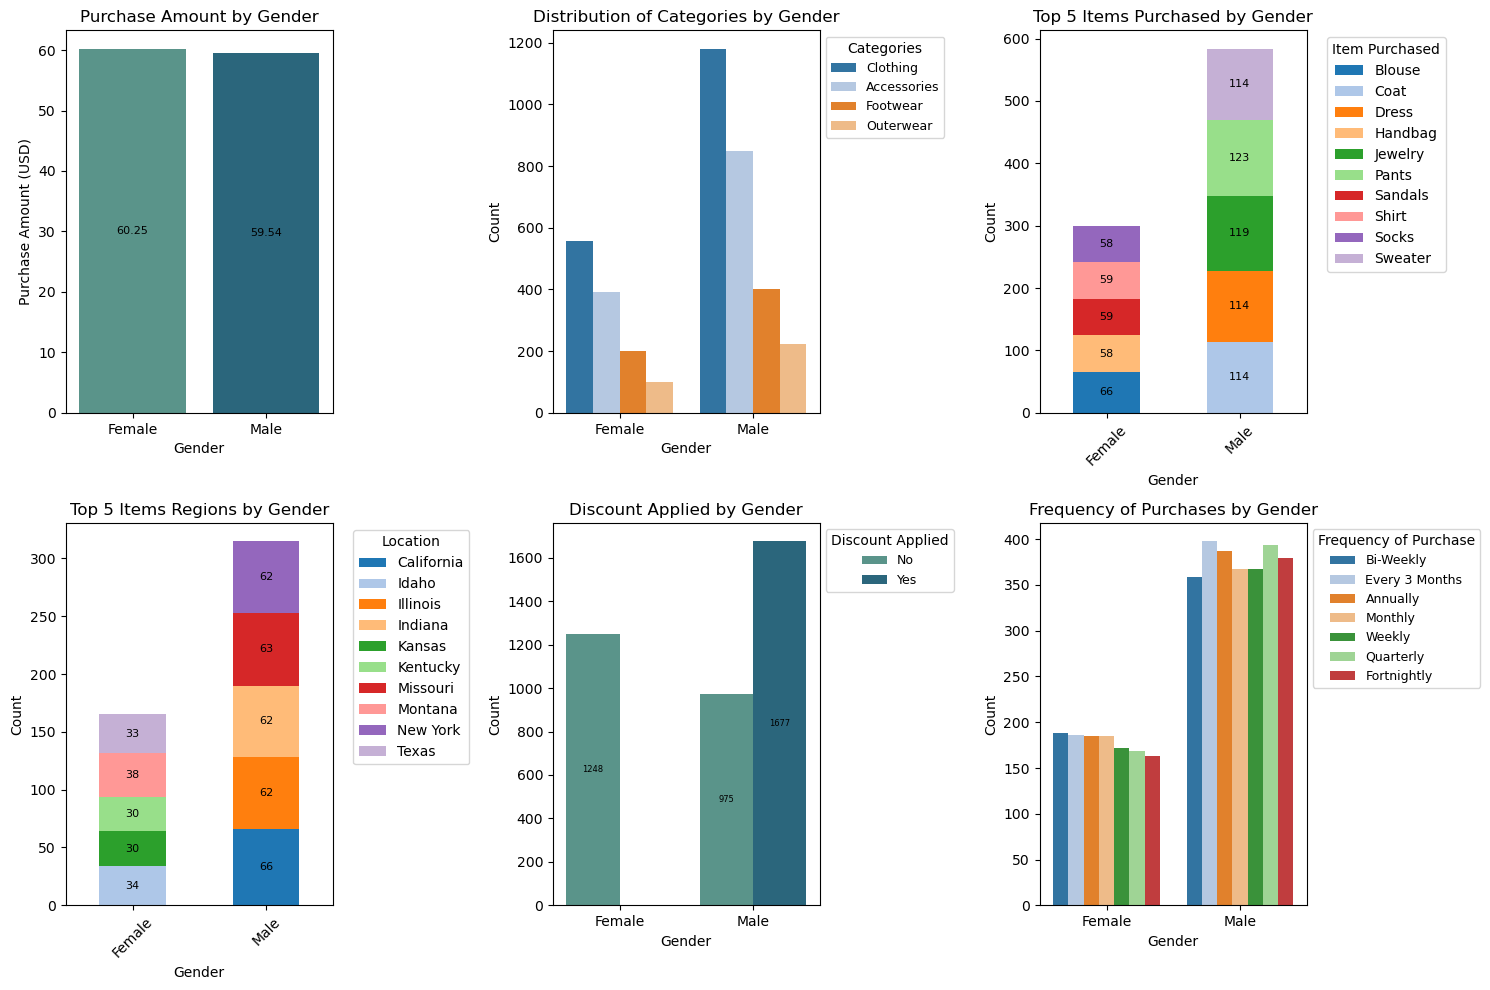

In [48]:
#Analysis based on gender
fig = plt.figure(figsize=(15,10))

# Plot 1
avg_purchase_amt_gender = df.groupby('Gender')['Purchase Amount (USD)'].mean().round(2).reset_index()

ax1g = plt.subplot(2,3,1)
sns.barplot(x='Gender', y='Purchase Amount (USD)', data= avg_purchase_amt_gender, palette='crest', ax=ax1g)
ax1g.set_xlabel('Gender')
ax1g.set_ylabel('Purchase Amount (USD)')
ax1g.set_title('Purchase Amount by Gender')
for c in ax1g.containers:
    ax1g.bar_label(c, label_type='center', fontsize=8)

    
# Plot 2
categories_by_gender = df.groupby('Gender')['Category'].value_counts().reset_index(name='Count')

ax2g = plt.subplot(2,3,2)
sns.barplot(categories_by_gender,x='Gender', y='Count', hue='Category', palette='tab20', ax=ax2g)
ax2g.set_title('Distribution of Categories by Gender')
ax2g.legend(title='Categories', bbox_to_anchor=(1,1), loc='upper left', fontsize=9)


#Plot 3 
popular_items_gender = df.groupby('Gender')['Item Purchased'].value_counts().groupby(level=0).head(5).reset_index(name='Count')

ax3g = plt.subplot(2,3,3)
plot_stacked_bar(
    popular_items_gender,
    index_col='Gender',
    value_col='Count',
    category_col='Item Purchased',
    palette='tab20',
    ax=ax3g,
    title='Top 5 Items Purchased by Gender'
)

#Plot 4
popular_regions_gender = df.groupby('Gender')['Location'].value_counts().groupby(level=0).head(5).reset_index(name='Count')

ax4g = plt.subplot(2,3,4)
plot_stacked_bar(
    popular_regions_gender,
    index_col='Gender',
    value_col='Count',
    category_col='Location',
    palette='tab20',
    ax=ax4g,
    title='Top 5 Items Regions by Gender'
)


# Plot 5
discount_app_by_gender = df.groupby('Gender')['Discount Applied'].value_counts().reset_index(name='Count')

ax5g = plt.subplot(2,3,5)
sns.barplot(discount_app_by_gender,x='Gender', y='Count', hue='Discount Applied', palette='crest', ax=ax5g)
ax5g.set_title('Discount Applied by Gender')
ax5g.legend(title='Discount Applied', fontsize=9, loc='upper left', bbox_to_anchor=(1, 1))
for c in ax5g.containers:
    ax5g.bar_label(c, label_type='center', fontsize=6)
    
# Plot 6
frequency_of_purchase_by_gender = df.groupby('Gender')['Frequency of Purchases'].value_counts().reset_index(name='Count')

ax6g = plt.subplot(2,3,6)
sns.barplot(frequency_of_purchase_by_gender,x='Gender', y='Count', hue='Frequency of Purchases', palette='tab20', ax=ax6g)
ax6g.set_title('Frequency of Purchases by Gender')
ax6g.legend(title='Frequency of Purchase', bbox_to_anchor=(1,1), loc='upper left', fontsize=9)

# Show all plots together
plt.tight_layout()
plt.show()

#### Location Analysis

In [38]:
#Analysis based on Location
location_groups = df.groupby('Location')

for location, location_data in location_groups:
    print(f'Location Trends for {location}:')
    
    # Gender distribution
    gender_dis= location_data['Gender'].value_counts().reset_index()
    print("Gender Distribution:")
    print("\t\t",gender_dis.iloc[0,0], gender_dis.iloc[0,1])
    print("\t\t",gender_dis.iloc[1,0], gender_dis.iloc[1,1])
    
    # Calculate average purchase amount
    avg_purchase_amt = location_data['Purchase Amount (USD)'].mean().round(2)
    print('Average Purchase Amount:', avg_purchase_amt )
    
    # Calculate most popular category
    popular_category = location_data['Category'].value_counts().idxmax()
    print('Most popular category:', popular_category)
    
    # Calculate most popular items
    popular_item = location_data['Item Purchased'].value_counts().idxmax()
    print('Most popular item:', popular_item)
    
    # Calculate most popular shipping type
    popular_shipping = location_data['Shipping Type'].value_counts().idxmax()
    print('Most popular shipping method:', popular_shipping)
    
    print('\n')
    

Location Trends for Alabama:
Gender Distribution:
		 Male 62
		 Female 27
Average Purchase Amount: 59.11
Most popular category: Clothing
Most popular item: Jewelry
Most popular shipping method: Express


Location Trends for Alaska:
Gender Distribution:
		 Male 48
		 Female 24
Average Purchase Amount: 67.6
Most popular category: Clothing
Most popular item: Backpack
Most popular shipping method: Standard


Location Trends for Arizona:
Gender Distribution:
		 Male 40
		 Female 25
Average Purchase Amount: 66.55
Most popular category: Clothing
Most popular item: Sweater
Most popular shipping method: Express


Location Trends for Arkansas:
Gender Distribution:
		 Male 54
		 Female 25
Average Purchase Amount: 61.11
Most popular category: Clothing
Most popular item: Gloves
Most popular shipping method: Next Day Air


Location Trends for California:
Gender Distribution:
		 Male 66
		 Female 29
Average Purchase Amount: 59.0
Most popular category: Clothing
Most popular item: Dress
Most popular sh

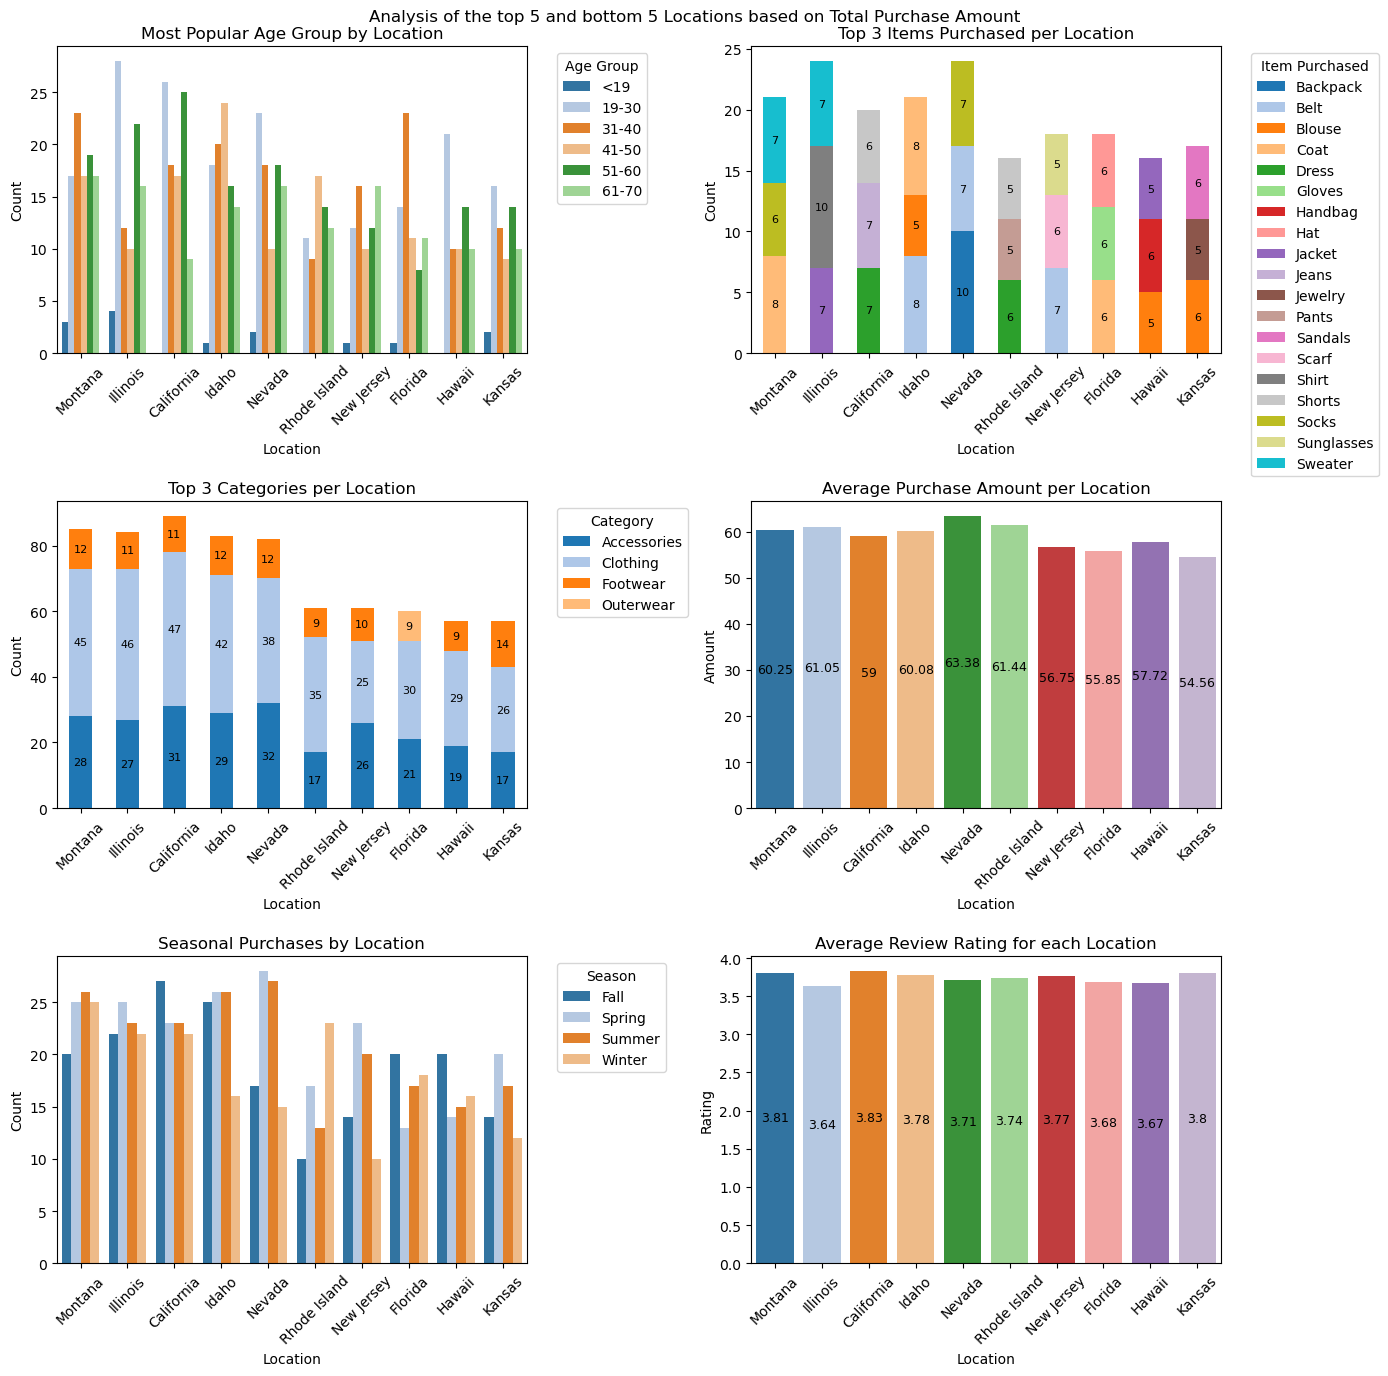

In [39]:
# Location Trends Cont'd with Visualization

# Selecting the top 5 and bottom 5 locations based on the sum of the purchase amount.
location_totals = location_groups['Purchase Amount (USD)'].sum().sort_values(ascending=False)
top_5 = location_totals.head(5).index
bottom_5 = location_totals.tail(5).index
target_locations = np.concatenate((top_5, bottom_5))

location_df = df[df['Location'].isin(target_locations)]


fig = plt.figure(figsize=(14,14))

# Plot 1
most_popular_age_group =location_df.groupby('Location')['Age Group'].value_counts().reset_index(name='Count')

ax1l = plt.subplot(3,2,1)
sns.barplot(most_popular_age_group, x='Location', y='Count', hue='Age Group', palette='tab20', order=target_locations, ax=ax1l)
ax1l.set_xticklabels(ax1l.get_xticklabels(), rotation=45)
ax1l.legend(title='Age Group', bbox_to_anchor=(1.05, 1),loc='upper left')
ax1l.set_title('Most Popular Age Group by Location')


# Plot 2
popular_items = location_df.groupby('Location')['Item Purchased'].value_counts().groupby(level=0).head(3).reset_index(name='Count')

ax2l = plt.subplot(3,2,2)
plot_stacked_bar(
    popular_items,
    index_col='Location',
    value_col='Count',
    category_col='Item Purchased',
    palette='tab20',
    ax=ax2l,
    title='Top 3 Items Purchased per Location',
    order=target_locations
)

# Plot 3
popular_category = location_df.groupby('Location')['Category'].value_counts().groupby(level=0).head(3).reset_index(name='Count')

ax3l = plt.subplot(3,2,3)
plot_stacked_bar(
    popular_category,
    index_col='Location',
    value_col='Count',
    category_col='Category',
    palette='tab20',
    ax=ax3l,
    title='Top 3 Categories per Location',
    order=target_locations
)

# Plot 4
avg_purchase = location_df.groupby('Location')['Purchase Amount (USD)'].mean().round(2).sort_values(ascending=False).reset_index()

ax4l = plt.subplot(3,2,4)
sns.barplot(avg_purchase, x='Location', y='Purchase Amount (USD)', palette='tab20', order=target_locations, ax=ax4l)
ax4l.set_ylabel('Amount')
ax4l.set_xticklabels(ax4l.get_xticklabels(), rotation=45)
ax4l.set_title('Average Purchase Amount per Location')
for c in ax4l.containers:
    ax4l.bar_label(c, label_type='center', fontsize=9)

# Plot 5
popular_season = location_df.groupby('Location')['Season'].value_counts().reset_index(name='Count')

ax5l = plt.subplot(3,2,5)
sns.barplot(popular_season, x='Location', y='Count', hue='Season', palette='tab20', order=target_locations, ax=ax5l)
ax5l.set_xticklabels(ax5l.get_xticklabels(), rotation=45)
ax5l.legend(title='Season', bbox_to_anchor=(1.05, 1),loc='upper left')
ax5l.set_title('Seasonal Purchases by Location')

# Plot 6
avg_review_location = location_df.groupby('Location')['Review Rating'].mean().round(2).sort_values(ascending=False).reset_index()

ax6l = plt.subplot(3,2,6)
sns.barplot(avg_review_location, x='Location', y='Review Rating', palette='tab20', order=target_locations, ax=ax6l)
ax6l.set_ylabel('Rating')
ax6l.set_xticklabels(ax6l.get_xticklabels(), rotation=45)
ax6l.set_title('Average Review Rating for each Location')
for c in ax6l.containers:
    ax6l.bar_label(c, label_type='center', fontsize=9)
    
    


plt.suptitle("Analysis of the top 5 and bottom 5 Locations based on Total Purchase Amount")
plt.tight_layout()
plt.show()

#### Age Analysis

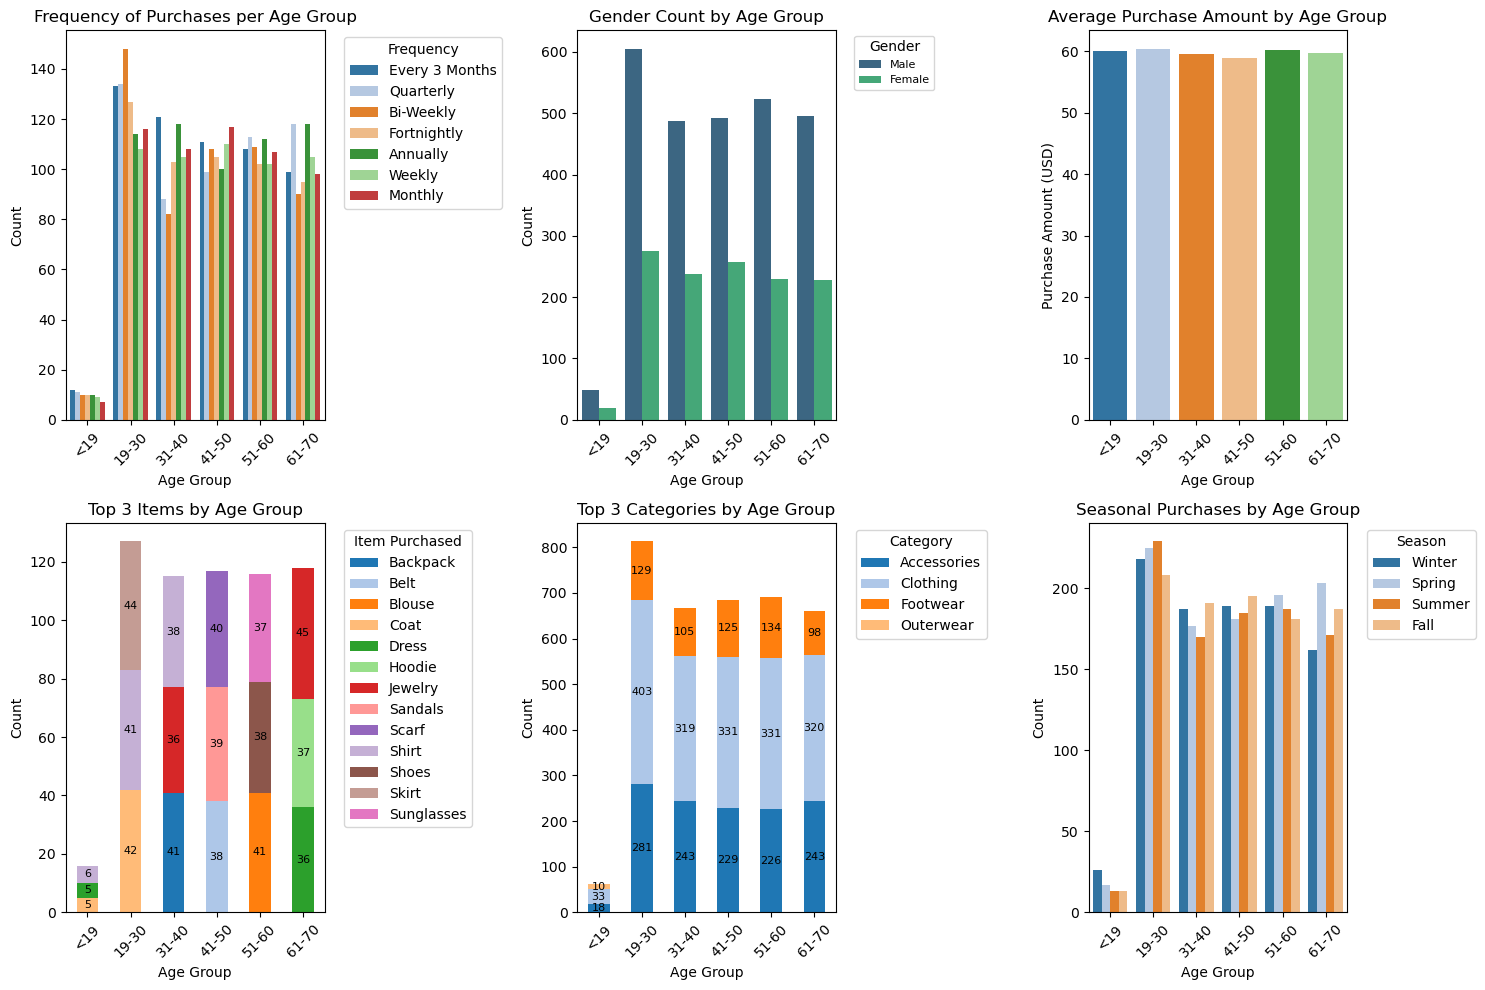

In [42]:
# Analysis based on Age and Age Group
fig = plt.figure(figsize=(15,10))

# Plot 1
age_purchase_frequency = df.groupby('Age Group')['Frequency of Purchases'].value_counts().reset_index(name='Count')

ax1a = plt.subplot(2,3,1)
sns.barplot(age_purchase_frequency, x='Age Group', y='Count', hue='Frequency of Purchases', palette='tab20', ax=ax1a)
ax1a.set_title("Frequency of Purchases per Age Group")
ax1a.set_xticklabels(ax1a.get_xticklabels(), rotation=45)
ax1a.legend(title='Frequency', loc='upper left', bbox_to_anchor=(1.05,1))

# Plot 2
age_gender_count = df.groupby('Age Group')['Gender'].value_counts().reset_index(name='Count')

ax2a = plt.subplot(2,3,2)
sns.barplot(age_gender_count, x='Age Group', y='Count', hue='Gender', palette='viridis', ax=ax2a)
ax2a.set_xticklabels(ax2a.get_xticklabels(), rotation=45)
ax2a.set_title('Gender Count by Age Group')
ax2a.legend(title='Gender',fontsize=8, bbox_to_anchor=(1.05,1), loc='upper left')

# Plot 3
age_avg_purchase_amt = df.groupby('Age Group')['Purchase Amount (USD)'].mean().reset_index()

ax3a = plt.subplot(2,3,3)
sns.barplot(age_avg_purchase_amt, x='Age Group', y='Purchase Amount (USD)', palette='tab20', ax=ax3a)
ax3a.set_xticklabels(ax3a.get_xticklabels(), rotation=45)
ax3a.set_title('Average Purchase Amount by Age Group')

#Plot 4
popular_item_age = df.groupby('Age Group')['Item Purchased'].value_counts().groupby(level=0).head(3).reset_index(name='Count')

ax4a = plt.subplot(2,3,4)
plot_stacked_bar(
    popular_item_age,
    index_col='Age Group',
    value_col='Count',
    category_col='Item Purchased',
    palette='tab20',
    ax=ax4a,
    title='Top 3 Items by Age Group',
)

#Plot 5
popular_category_age = df.groupby('Age Group')['Category'].value_counts().groupby(level=0).head(3).reset_index(name='Count')

ax5a = plt.subplot(2,3,5)
plot_stacked_bar(
    popular_category_age,
    index_col='Age Group',
    value_col='Count',
    category_col='Category',
    palette='tab20',
    ax=ax5a,
    title='Top 3 Categories by Age Group'
)

#Plot 6
popular_season_age = df.groupby('Age Group')['Season'].value_counts().reset_index(name='Count')

ax6a = plt.subplot(2,3,6)
sns.barplot(popular_season_age, x='Age Group', y='Count', hue='Season', palette='tab20', ax=ax6a)
ax6a.set_xticklabels(ax6a.get_xticklabels(), rotation=45)
ax6a.legend(title='Season', bbox_to_anchor=(1.05, 1),loc='upper left')
ax6a.set_title('Seasonal Purchases by Age Group')


plt.tight_layout()
plt.show()

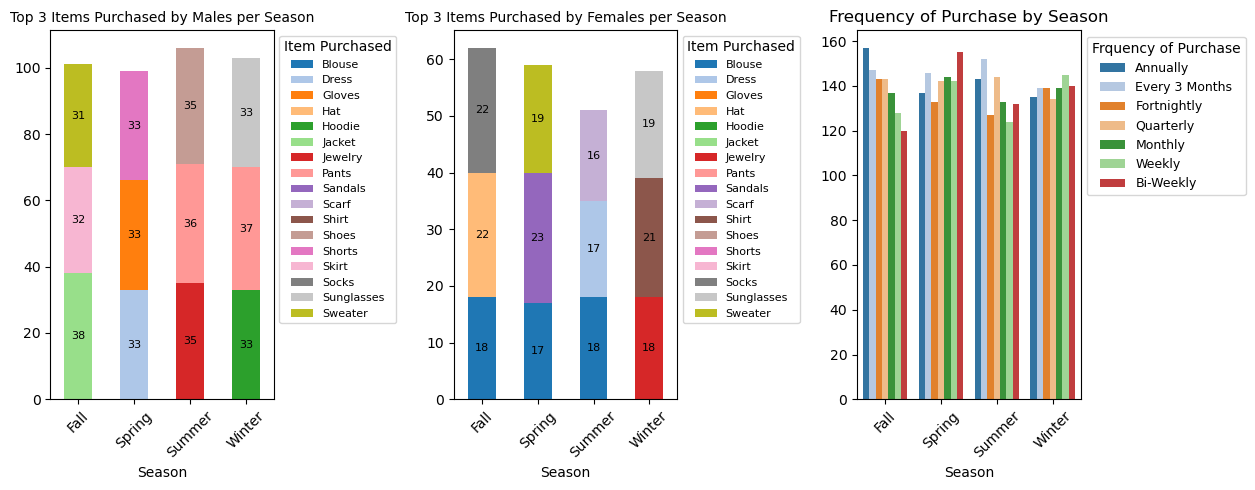

In [44]:
# Analysis based on season

# Creating datasets
grouped_season = df.groupby(['Season', 'Item Purchased', 'Gender']).size().reset_index(name='Count')
grouped_male_season = grouped_season[grouped_season['Gender']=='Male']
sorted_male_season = grouped_male_season.sort_values(['Season', 'Count'], ascending=[True, False])
top_items_male_season = sorted_male_season.groupby('Season').head(3).reset_index(drop=True)

grouped_female_season = grouped_season[grouped_season['Gender']=='Female']
sorted_female_season = grouped_female_season.sort_values(['Season', 'Count'], ascending=[True, False])
top_items_female_season = sorted_female_season.groupby('Season').head(3).reset_index(drop=True)

all_top_items = pd.concat([top_items_male_season, top_items_female_season])
unique_items = all_top_items['Item Purchased'].unique()
season_item_palette =  sns.color_palette('tab20', len(unique_items))
season_item_colormap = dict(zip(sorted(unique_items),season_item_palette))
ordered_columns = sorted(unique_items)


fig = plt.figure(figsize=(15,5))

# Plot 1

pivot_top_items_male_season = top_items_male_season.pivot(index='Season', columns='Item Purchased', values='Count').fillna(0)
pivot_top_items_male_season = pivot_top_items_male_season.reindex(columns=ordered_columns,fill_value=0)

ax1s = plt.subplot(1,4,1)
pivot_top_items_male_season.plot(kind='bar', stacked=True, color=[season_item_colormap[col] for col in pivot_top_items_male_season.columns], ax=ax1s)
ax1s.set_title("Top 3 Items Purchased by Males per Season", fontsize=10)
ax1s.legend(title="Item Purchased", bbox_to_anchor=(1,1), fontsize=8)
ax1s.set_xticklabels(ax1s.get_xticklabels(), rotation=45)

for c in ax1s.containers:
        labels = [f"{v.get_height():.0f}" if v.get_height() > 0 else "" for v in c]
        ax1s.bar_label(c, labels=labels, label_type='center', fontsize=8)

# Plot 2
pivot_top_items_female_season = top_items_female_season.pivot(index='Season', columns='Item Purchased', values='Count').fillna(0)
pivot_top_items_female_season = pivot_top_items_female_season.reindex(columns=ordered_columns,fill_value=0)

ax2s = plt.subplot(1,4,2)
pivot_top_items_female_season.plot(kind='bar', stacked=True, color=[season_item_colormap[col] for col in pivot_top_items_female_season.columns], ax=ax2s)
ax2s.set_title("Top 3 Items Purchased by Females per Season", fontsize=10)
ax2s.legend(title="Item Purchased", bbox_to_anchor=(1,1), fontsize=8)
ax2s.set_xticklabels(ax2s.get_xticklabels(), rotation=45)

for c in ax2s.containers:
        labels = [f"{v.get_height():.0f}" if v.get_height() > 0 else "" for v in c]
        ax2s.bar_label(c, labels=labels, label_type='center', fontsize=8)
        
# Plot 3
frequency_purchase_season = df.groupby('Season')['Frequency of Purchases'].value_counts().reset_index(name='Count')

ax3s=plt.subplot(1,4,3)
sns.barplot(frequency_purchase_season, x='Season', y='Count', hue='Frequency of Purchases', palette='tab20', ax=ax3s)
ax3s.set_title("Frequency of Purchase by Season")
ax3s.set_xticklabels(ax3s.get_xticklabels(), rotation=45)
ax3s.set_ylabel('')
ax3s.legend(title="Frquency of Purchase", fontsize=9, bbox_to_anchor=(1,1))


plt.tight_layout()
plt.show()

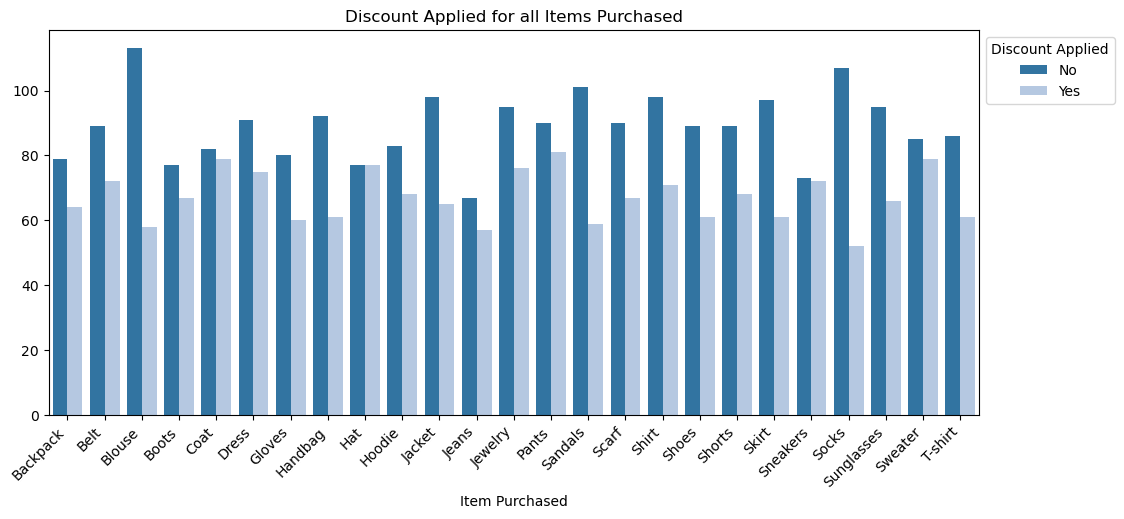

In [78]:
# Analysis of Discount Applied for all Items Purchased

discount_app_items = df.groupby('Item Purchased')['Discount Applied'].value_counts().reset_index(name='Count')
discount_app_items

fig = plt.figure(figsize=(12, 5))

# Plot 1 
sns.barplot(discount_app_items, x='Item Purchased', y='Count', hue='Discount Applied', palette='tab20')
plt.title('Discount Applied for all Items Purchased')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Discount Applied', bbox_to_anchor=(1,1))
plt.ylabel("")
plt.show()

<h2 style="text-align:center; background-color:yellow; color:black;">Insights Found</h2>

### The insights found will focus on the:
* Disproportionate Gender Distribution
* Likely Cause
* Potential Benefits
* Additional Insights

#### Disproportionate Gender Distribution
The data reveals a significant imbalance in customer gender distribution. Overall, `68%` of customers are male, while only `32%` are female. This pattern is consistent across all states, with no state showing a majority of female customers.  

#### Likely Cause
One potential factor driving this imbalance is the application of discounts. According to the data, none (`0%`) of women’s purchases included a discount, while approximately `37%` of men’s purchases did. This suggests that discount allocation practices may be contributing to lower female customer engagement.

To address this imbalance, discount strategies should more directly target female customers. Since discounts are already applied across products, the issue lies not in product-level allocation but in ensuring that women also benefit from these offers. 

#### Potential Benefits
Women on average spend slightly more per purchase and also shop more frequently, with women spending about `$60.25` compared to men’s `$59.54`. While this difference in purchase amounts is small, the frequency gap is significant: women tend to buy `bi-weekly`, whereas men purchase only about `every 3 months`.  

This suggests that focusing on expanding the female customer base could drive considerable profit growth, since higher purchase frequency amplifies even small differences in average spend. Growth could be further enhanced by offering targeted incentives, such as modest discounts or loyalty rewards. These are likely to encourage even more frequent purchases among female customers.

#### Additional Insights
Analysis by age revealed that customers aged 19–30 have the highest average purchase amounts and also represent the largest proportion of female customers. This indicates that, if targeting resources are limited, focusing on this segment of the female demographic could yield the greatest impact.

State-level analysis shows variation in both average purchase amounts and popular categories. Combining this with seasonal trends, marketing and discount strategies could be tailored to high-potential states or regions to maximize engagement and revenue among female customers.